# Tarefa 01

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

In [10]:
from pandas_datareader import data as pdr

import plotly.express as px
from plotly import graph_objects
import yfinance as yf
yf.pdr_override()

import datetime as dt
import pandas as pd
import numpy as np

#### 1. Baixando dados de ativos
    1. Baixe os dados de três ativos da sua escolha do Yahoo Finance, correspondente a um período de pelo menos 2 anos até a data mais recente.
    2. Salve esses dados para que você possa utilizá-los na próxima tarefa.

In [11]:
%%time

start_date = dt.datetime(2019, 1, 1)
end_date = dt.datetime(2022, 12, 31)

yf = pdr.get_data_yahoo(['MSFT', 'DIS', 'AAPL'], start=start_date, end=end_date)
yf.head()

[*********************100%***********************]  3 of 3 completed
Wall time: 637 ms


Adj Close                             Close              \
                 AAPL         DIS       MSFT       AAPL         DIS   
Date                                                                  
2019-01-02  38.047050  107.654335  96.632660  39.480000  108.970001   
2019-01-03  34.257275  105.046211  93.077736  35.547501  106.330002   
2019-01-04  35.719696  108.286606  97.406715  37.064999  109.610001   
2019-01-07  35.640202  109.225136  97.530937  36.982498  110.559998   
2019-01-08  36.319603  110.074760  98.238106  37.687500  111.419998   

                             High                                Low  \
                  MSFT       AAPL         DIS        MSFT       AAPL   
Date                                                                   
2019-01-02  101.120003  39.712502  109.139999  101.750000  38.557499   
2019-01-03   97.400002  36.430000  108.650002  100.190002  35.500000   
2019-01-04  101.930000  37.137501  110.750000  102.510002  35.950001   
2019-01-07  102.059998  37.207500  111.400002  103.269997  36.474998   
2019-01-08  102.800003  37.955002  112.559998  103.970001  37.130001   

                                         Open                          \
                   DIS        MSFT       AAPL         DIS        MSFT   
Date                                                                    
2019-01-02  107.730003   98.940002  38.722500  108.099998   99.550003   
2019-01-03  105.940002   97.199997  35.994999  108.480003  100.099998   
2019-01-04  107.250000   98.930000  36.132500  107.940002   99.720001   
2019-01-07  109.300003  100.980003  37.174999  109.910004  101.639999   
2019-01-08  111.169998  101.709999  37.389999  111.800003  103.040001   

               Volume                      
                 AAPL       DIS      MSFT  
Date                                       
2019-01-02  148158800   9723500  35329300  
2019-01-03  365248800  10594700  42579100  
2019-01-04  234428400  10122800  44060600  
2019-01-07  219111200   6714700  35656100  
2019-01-08  164101200   8730700  31514400

In [12]:
yf.to_csv('dadosLimpos.csv', sep=',')

In [13]:
yf.shape

(1008, 18)

#### 2. Observando a volatilidade dentro do dia
1. Calcule a amplitude de variação do valor do ativo dentro do dia. Essa amplitude você pode calcular com um comando simples de adicionar uma coluna no Pandas: (valor máximo - valor mínimo).
2. Monte um gráfico de linha mostrando a variação dessa amplitude ao longo do período coletado, por ativo.
3. Veja se consegue identificar que ativo apresentou maior volatilidade.

In [14]:
amplitudade = yf['High'] - yf['Low']
amplitudade

,AAPL,DIS,MSFT
Date,,,
2019-01-02,1.155003,1.409996,2.809998
2019-01-03,0.930000,2.709999,2.990005
2019-01-04,1.187500,3.500000,3.580002
2019-01-07,0.732502,2.099998,2.289993
2019-01-08,0.825001,1.389999,2.260002
...,...,...,...
2022-12-23,2.779999,2.300003,4.929993
2022-12-27,2.690002,1.980003,3.099991
2022-12-28,5.159996,2.620003,5.550003


In [15]:
amplitudade_vertical = yf['Adj Close'].stack().reset_index()
amplitudade_vertical.columns = ['data', 'ativo', 'valor']

amplitudade_vertical.head()

,data,ativo,valor
0,2019-01-02,AAPL,38.047050
1,2019-01-02,DIS,107.654335
2,2019-01-02,MSFT,96.632660
3,2019-01-03,AAPL,34.257275
4,2019-01-03,DIS,105.046211


In [16]:
fig = px.line(amplitudade_vertical, x='data', y='valor', color='ativo', template='plotly_dark')
fig.show()

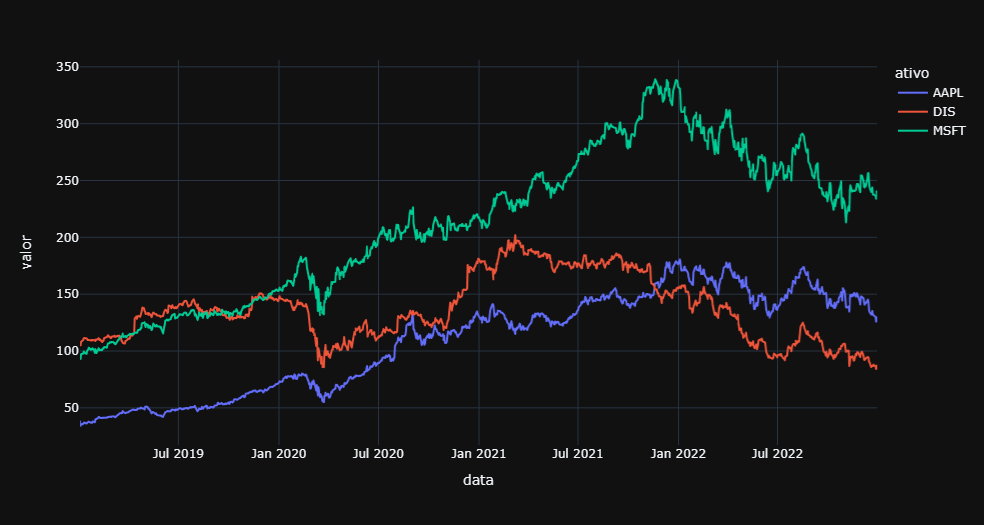

In [17]:
fig = px.line(amplitudade_vertical, x='data', y='valor', color='ativo', template='plotly_white')
fig.show()

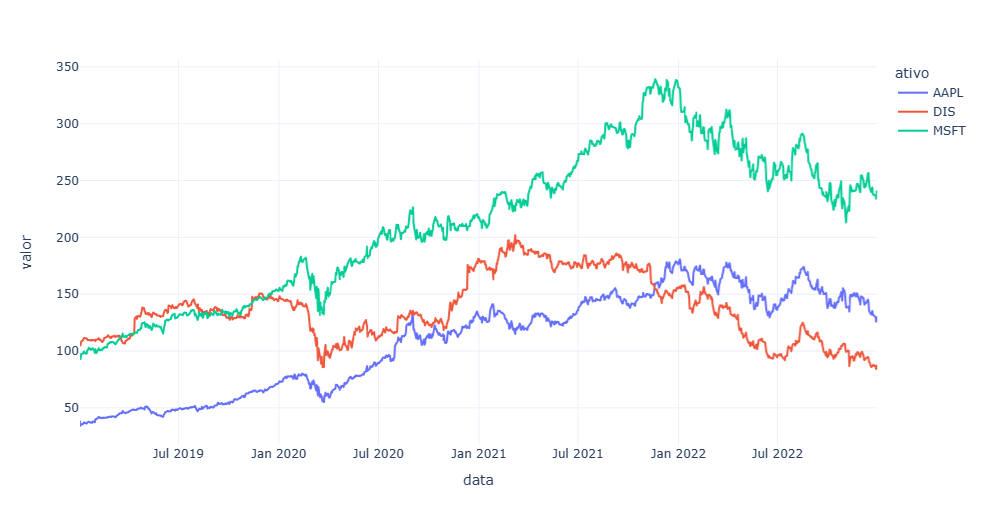

In [18]:
fig = px.line(amplitudade_vertical, x='data', y='valor', color='ativo', template='simple_white')
fig.show()

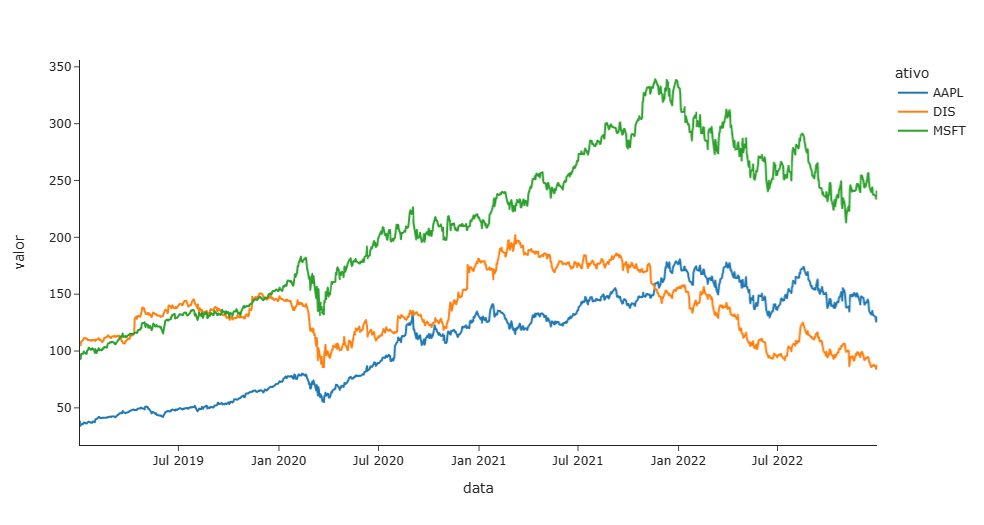